***
# **<center>COURS PYTHON 2IMACS #8</center>**
# ***<center>Fichiers</center>***

***

Comme nous avons commencé à le voir dans de précédents exemples, nous allons avoir besoin de charger des données à analyser depuis differents types de fichiers. De même nous aurons besoin de sauver nos analyses pour les partager ou pour des modifications futures. Nous allons donc avoir besoin de créer, modifier et sauver des fichiers. De nombreux formats et methodes sont à notre disposition pour ces opérations.

Avant  de commencer, précisons qu'il existe 2 manières d'indiquer l'emplacement d'un dossier (ou repertoire) ou d'un fichier.  
**- Le chemin absolu:** spécifie l'emplacement complet d'un fichier ou d'un répertoire à partir de la racine du système de fichiers. Sous Windows, un exemple de chemin absolu serait : "C:\Users\Utilisateur\Documents\mon_fichier.txt". Le chemin absolu fournit l'emplacement précis du fichier indépendamment de l'emplacement courant (en général celui du code python). Attention si on passe sur une autre machine il sera à modifier.  
**- Un chemin relatif:** spécifie l'emplacement d'un fichier ou d'un répertoire par rapport à l'emplacement courant. Sous Windows, un exemple de chemin relatif serait : "mon_dossier\mon_fichier.txt". Le chemin relatif indique que le fichier se trouve dans le répertoire "Documents" situé dans le répertoire courant.

Il faut remarquer que suivant les IDE, les chemins peuvent contenir des '/' (par exemple jupyter) ou des '\\' (par exemple spyder),ou encore des '//'
Signalons également que l'on a la possibilité de remonter dans les dossiers parents avec '../'

# 8-1 Création de fichiers

## 8-1-1 Syntaxe 'open' et 'close'

Créeons notre premier fichier. Nous définissons un chemin , ouvrons le fichier, puis refermons le.

In [1]:
chemin = 'fichiers_cours/fichiers/fichiers_crees/mon_fichier.txt'
# creer le fichier 
fichier = open(chemin, 'w')
# Fermer le fichier
fichier.close()

## 8-1-2 Syntaxe 'with'

Une autre syntaxe permet de ne pas se préocuper de fermer de la fermeture du fichier, ça peut éviter des oublis et des erreurs...

In [2]:
chemin = 'fichiers_cours/fichiers/fichiers_crees/mon_fichier1.txt'

In [3]:
with open(chemin, 'w') as fichier: # creer le fichier
   pass # ne rien faire...

## 8-1-3 Modes d'ouverture des fichiers

Nous avons le choix entre 3 modes d'ouverture des fichiers:   
**- Lecture: 'r' :** permet d'accéder aux données à partir du fichier, mais pas de modifier ou écrire de nouvelles données   
**- Ecriture: 'w' :**  créer un nouveau fichier ou écraser le contenu d'un fichier existant  
**- Ajout: 'a' :** écrire de nouvelles données à la fin du fichier sans supprimer son contenu précédent  

# 8-2 Lecture et écriture dans un fichier texte

## 8-2-1 Méthodes read() et write()

Ecrire:

In [4]:
chemin = 'fichiers_cours/fichiers/fichiers_crees/mon_fichier2.txt'

In [5]:
with open(chemin, 'w') as fichier:
    fichier.write('What... is your favorite color?')

Lire:

In [7]:
with open(chemin, 'r') as fichier:
    contenu = fichier.read()
    print(contenu)

What... is your favorite color?


Ajouter:

In [8]:
with open(chemin, 'a') as fichier:
    fichier.write('Ni - The Knights Who Say Ni')

In [9]:
with open(chemin, 'r') as fichier:
    contenu = fichier.read()
    print(contenu)

What... is your favorite color?Ni - The Knights Who Say Ni


## 8-2-2 Méthodes readline() et readlines()

On pourrait apporter une amélioration, en effet, les differents ajouts vont se faire les uns à la suite des autres. Des retours à la ligne seraient bienvenus. Utilisons les méthodes apropriées.

Pour l'écriture, on se contentera d'ajouter un retour chariot ('\n) en fin de ligne

In [10]:
with open(chemin, 'a') as fichier:
    for i in range(5):
        fichier.write('\nNi')

La methode read affichera l'ensemble du contenu

In [11]:
with open(chemin, 'r') as fichier:
    contenu = fichier.read()
    print(contenu)

What... is your favorite color?Ni - The Knights Who Say Ni
Ni
Ni
Ni
Ni
Ni


Avec la methode readlines, on peut parcourir le fichier ligne à ligne.  
**fichier.readlines()** va renvoyer une liste dont chaque élément est le contenu d'une ligne.

In [13]:
with open(chemin, 'r') as fichier:
    lignes = fichier.readlines()  # Lecture de toutes les lignes du fichier
    nombre_lignes = len(lignes)  # Nombre de lignes dans le fichier 
    print('le fichier contient ',nombre_lignes,' lignes')
    print(' le contenu du fichier est: ',lignes)

le fichier contient  6  lignes
 le contenu du fichier est:  ['What... is your favorite color?Ni - The Knights Who Say Ni\n', 'Ni\n', 'Ni\n', 'Ni\n', 'Ni\n', 'Ni']


Cette methode est trés efficace avec une boucle for pour afficher les lignes séparemment

In [15]:
with open(chemin, 'r') as fichier:
    lignes = fichier.readlines()  # Lecture de toutes les lignes du fichier
    for ligne in lignes:
        print(ligne)

What... is your favorite color?Ni - The Knights Who Say Ni

Ni

Ni

Ni

Ni

Ni


## 8-3 Lecture et écriture dans d'autres formats de fichiers

## 8-3-1  Fichiers csv

Pandas permet une manipulation très pratiques des fichiers textes et csv. Créons un pandas dataframe

In [16]:
import pandas as pd

# Création d'un DataFrame
data = pd.DataFrame({'Nom': ['Alice', 'Bob', 'Charlie'],
                     'Age': [25, 30, 35]})
data.head()

,Nom,Age
0,Alice,25
1,Bob,30
2,Charlie,35


Sauvegardons dans un fichier texte

In [17]:
data.to_csv('fichiers_cours/fichiers/fichiers_crees/ages.txt')

Si on ouvre le fichier, on voit que le format est bien en 2 colonnes. Elles sont séparées par des ',' on peut choisir d'autres séparateurs comme la tabulation, de même, on peut choisir de ne pas afficher les numéros de ligne:

In [18]:
data.to_csv('fichiers_cours/fichiers/fichiers_crees/ages.txt', sep='\t',index = False)

Le format csv est bien sûr pris en charge

In [19]:
data.to_csv('fichiers_cours/fichiers/fichiers_crees/ages.csv',sep='\t',index = False)

De la même manière ce type de données peut être chargé avec **pd.read_csv** :

- Pour du csv

In [21]:
data_lues_csv = pd.read_csv('fichiers_cours/fichiers/fichiers_crees/ages.csv', sep='\t')
data_lues_csv.head()

,Nom,Age
0,Alice,25
1,Bob,30
2,Charlie,35


- Pour du texte

In [22]:
data_lues_txt = pd.read_csv('fichiers_cours/fichiers/fichiers_crees/ages.txt', sep='\t')
data_lues_txt.head()

,Nom,Age
0,Alice,25
1,Bob,30
2,Charlie,35


Les fonctions **np.savetxt** et **np.loadtxt** de numpy fonctionnent sur le même modéle

In [23]:
import numpy as np
# Création d'un tableau NumPy
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# Écriture du tableau dans un fichier CSV
np.savetxt('fichiers_cours/fichiers/fichiers_crees/mon_numpy.csv', data, delimiter='\t')

On peut choisir le format:

In [24]:
np.savetxt('fichiers_cours/fichiers/fichiers_crees/mon_numpy.csv', data, delimiter='\t', fmt='%d')

même chose pour le format txt:

In [25]:
np.savetxt('fichiers_cours/fichiers/fichiers_crees/mon_numpy.txt', data, delimiter='\t', fmt='%d')

Et pour charger les données:

In [27]:
data_lues_np_csv = np.loadtxt('fichiers_cours/fichiers/fichiers_crees/mon_numpy.txt')
print(data_lues_np_csv)
print('-----')
print(data)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----
[[1 2 3]
 [4 5 6]
 [7 8 9]]


On a récupéré les données par lignes, pour les récupérer par colonne, il faut utiliser l'argument unpack = True.

In [28]:
data_lues_np_txt = np.loadtxt('fichiers_cours/fichiers/fichiers_crees/mon_numpy.txt', unpack = True)
print(data_lues_np_txt)

[[1. 4. 7.]
 [2. 5. 8.]
 [3. 6. 9.]]


## 8-3-2  Matplotlib

Matplotlib offre la possibilité de sauvegarder des graphiques et des figures dans différents formats de fichiers tels que PNG, JPEG, PDF grace à la methode savefig.

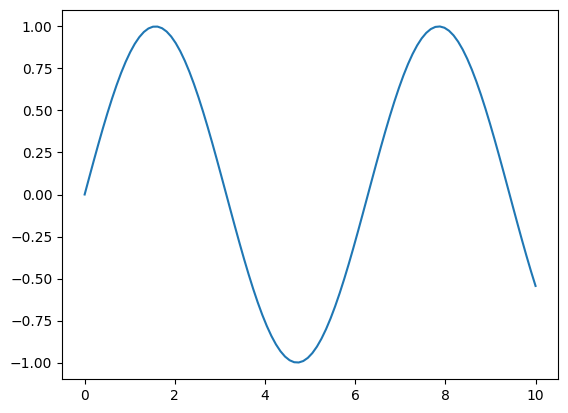

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Exemple 1 : Sauvegarde d'un tracé simple en PNG
x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)

plt.savefig('fichiers_cours/fichiers/fichiers_crees/plot.jpg')

De même , il est possible de charger un fichier image avec matplotlib

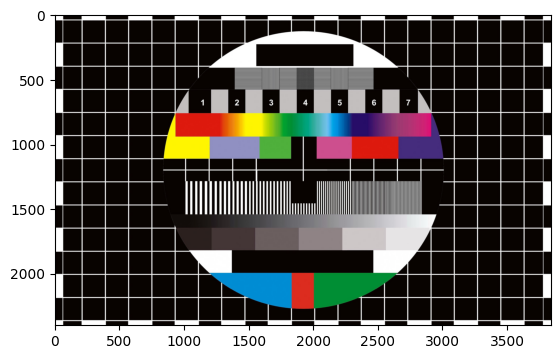

In [30]:
image = plt.imread('fichiers_cours/fichiers/image.jpg')
fig, ax = plt.subplots()
ax.imshow(image);

[Exercice 1](exercices/Exercices8.ipynb)

## 8-3-3  Module pickle pour fichiers binaires

Le module **pickle** permet de sauvegarder dans un fichier binaire n'importe quel objet python. On peut l'utiliser pour des listes, dictionnaires, tablaux numpy, pandas dataframe...
Reprenons l'exemple d'un Pandas Dataframe:

In [31]:
import numpy as np
import pandas as pd
data_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
df = pd.DataFrame(data_array)
df.index = ['ligne1', 'ligne2', 'ligne3', 'ligne4']
df.columns = ['colonne1', 'colonne2', 'colonne3']
print(df)

        colonne1  colonne2  colonne3
ligne1         1         2         3
ligne2         4         5         6
ligne3         7         8         9
ligne4        10        11        12


Créons notre fichier pickle

In [32]:
import pickle
chemin = 'fichiers_cours/fichiers/fichiers_crees/mon_fichier_pkl.pkl'
with open(chemin, 'wb') as fichier: #on remarque que ici on est en mode lecture (w) et binaire (b)
    pickle.dump(df, fichier)

Bien sûr, le fichier binaire ne sera pas lisible avec un bloc note. Il faudra le charger à nouveau et le traiter comme un fichier pandas.

In [33]:
with open(chemin, 'rb') as fichier:
    df_load = pickle.load(fichier)
print(df_load)

        colonne1  colonne2  colonne3
ligne1         1         2         3
ligne2         4         5         6
ligne3         7         8         9
ligne4        10        11        12


## 8-3-4 Autres types de fichiers

La methode pickle est quasi universelle pour les objets python, cependant, il existe d'autres types de fichiers qui peuvent avoir des interêts dans certaines situations.

| Format de fichier | Intérêt spécifique                                                | Bibliothèque associée      | Avantages                                                           | Limitations                                                                         |
|-------------------|-------------------------------------------------------------------|----------------------------|----------------------------------------------------------------------|-------------------------------------------------------------------------------------|
| HDF5              | Stockage de données scientifiques complexes et hiérarchiques       | h5py (Python)              | - Prise en charge de structures de données complexes. <br> - Compression des données. <br> - Lecture et écriture efficaces. | - L'apprentissage peut être long... <br> - Certaines fonctionnalités avancées peuvent être complexes. |
| JSON              | Stockage de données structurées lisibles par l'homme              | json (Python)              | - Facilité de lecture et d'écriture. <br> - Compatibilité multi-langages. <br> - Prise en charge des types de données courants. | - Moins efficace en termes d'espace de stockage et de performance. <br> - Limité aux types de données simples. |
| XML               | Stockage de données structurées                                   | xml.etree.ElementTree (Python) | - Structure hiérarchique. <br> - Compatibilité avec de nombreux langages. <br> - Extensibilité. | - Verbeux, nécessitant souvent plus d'espace de stockage que d'autres formats. <br> - Peut être complexe pour les données non structurées. |


- Ouverture de fichier json

In [35]:
import json

# Chemin vers le fichier JSON
chemin = 'fichiers_cours/fichiers/align.json'

# Ouvrir le fichier JSON en mode lecture
with open(chemin, 'r') as fichier:
    # Charger les données JSON dans une variable Python
    donnees = json.load(fichier)

# Afficher les données
print(donnees)

[[-72, -191], [-75, -194], [-75, -189], [-75, -185], [-75, -183], [-75, -177], [-75, -188], [-75, -189], [-75, -186], [-74, -189], [-75, -187], [-74, -186], [-72, -200], [-75, -196], [-74, -198], [-75, -198], [-75, -198], [-75, -198], [-75, -198], [-75, -198], [-75, -198], [-75, -193], [-75, -189], [-74, -184], [-75, -180], [-75, -178], [-75, -174], [-75, -164], [-75, -161], [-75, -159], [-75, -153], [-75, -145], [-75, -140], [-75, -134], [-75, -127], [-75, -119], [-75, -114], [-75, -109], [-75, -102], [0, 6], [0, 0], [0, 0], [0, 8], [0, 14], [0, 17], [0, 22], [0, 26], [0, 31], [0, 35], [0, 41], [0, 43], [0, 48], [0, 53], [7, 60], [17, 66], [24, 68], [24, 73], [25, 81], [27, 81], [25, 85], [36, 85], [41, 81], [45, 78], [47, 73], [48, 71], [58, 66], [63, 58], [72, 53], [79, 55], [86, 53], [86, 52], [90, 51], [96, 50], [104, 53], [112, 54], [111, 49], [110, 47], [111, 48], [118, 47], [129, 50], [135, 48], [131, 55], [133, 57], [131, 62]]


Avec Pandas

In [37]:
# Charger le fichier JSON dans un DataFrame pandas
donnees = pd.read_json(chemin)

# Afficher les premières lignes du DataFrame pour explorer les données
donnees.head()

,0,1
0,-72,-191
1,-75,-194
2,-75,-189
3,-75,-185
4,-75,-183


- Ouverture de fichier xml

In [38]:
import xml.etree.ElementTree as ET

# Chemin vers le fichier XML
chemin = 'fichiers_cours/fichiers/test.xml'

# "Analyse" du fichier XML
arbre = ET.parse(chemin)

# Obtention de la racine de l'arbre XML
racine = arbre.getroot()

# Affichage des informations de chaque livre
for livre in racine.findall('book'):
    print("------------------------------------")
    print("ID:", livre.attrib['id'])
    print("Auteur:", livre.find('author').text)
    print("Titre:", livre.find('title').text)
    print("Genre:", livre.find('genre').text)
    print("Prix:", livre.find('price').text)
    print("Date de publication:", livre.find('publish_date').text)
    print("Description:", livre.find('description').text)
    print()

------------------------------------
ID: bk101
Auteur: Gambardella, Matthew
Titre: XML Developer's Guide
Genre: Computer
Prix: 44.95
Date de publication: 2000-10-01
Description: An in-depth look at creating applications 
      with XML.

------------------------------------
ID: bk102
Auteur: Ralls, Kim
Titre: Midnight Rain
Genre: Fantasy
Prix: 5.95
Date de publication: 2000-12-16
Description: A former architect battles corporate zombies, 
      an evil sorceress, and her own childhood to become queen 
      of the world.

------------------------------------
ID: bk103
Auteur: Corets, Eva
Titre: Maeve Ascendant
Genre: Fantasy
Prix: 5.95
Date de publication: 2000-11-17
Description: After the collapse of a nanotechnology 
      society in England, the young survivors lay the 
      foundation for a new society.

------------------------------------
ID: bk104
Auteur: Corets, Eva
Titre: Oberon's Legacy
Genre: Fantasy
Prix: 5.95
Date de publication: 2001-03-10
Description: In post-apocalypse

- Ouverture de fichier h5

In [40]:
import h5py

# Chemin vers le fichier h5 contenant le modèle
chemin = 'fichiers_cours/fichiers/model.h5'

# Ouvrir le fichier h5 en mode lecture
with h5py.File(chemin, 'r') as fichier:
    # Afficher les clés du fichier
    print("Clés du fichier h5 :", list(fichier.keys()))

Clés du fichier h5 : ['model_weights', 'optimizer_weights']


In [41]:
with h5py.File(chemin, 'r') as fichier:
    # Accéder aux poids du modèle
    poids_du_modele = fichier['model_weights']

    # Afficher les clés des poids du modèle
    print("Clés des poids du modèle :", list(poids_du_modele.keys()))

Clés des poids du modèle : ['conv2d', 'conv2d_1', 'conv2d_2', 'dense', 'dense_1', 'flatten', 'max_pooling2d', 'max_pooling2d_1', 'top_level_model_weights']


In [42]:
# Ouvrir le fichier h5 en mode lecture
with h5py.File(chemin, 'r') as fichier:
    # Accéder aux valeurs des poids de la couche dense
    valeurs_des_poids_dense = fichier['model_weights']['dense']['dense']['kernel:0'][:]
    print("Forme du tableau de poids de la couche dense :", valeurs_des_poids_dense.shape) 
    print('------------------------------')
    print("Valeurs du tableau de poids de la couche dense :", valeurs_des_poids_dense) 

Forme du tableau de poids de la couche dense : (464640, 64)
------------------------------
Valeurs du tableau de poids de la couche dense : [[-0.00889298  0.00613157  0.00334098 ...  0.00586064  0.00643732
   0.0001577 ]
 [-0.00024623 -0.00249325  0.00368154 ...  0.00374264  0.00124047
  -0.00259123]
 [-0.00109996  0.00260828  0.00877075 ...  0.00672673  0.00344456
   0.0006301 ]
 ...
 [-0.00331655  0.00302126 -0.00587311 ...  0.00159324  0.00213183
  -0.00253912]
 [ 0.00192119 -0.00108255 -0.00696555 ... -0.00652238  0.00043378
   0.00158696]
 [ 0.00104254  0.00318544 -0.00486458 ... -0.00455663 -0.00364475
  -0.00128081]]


# 8-4 Manipulations avancées de fichier et interaction avec le système d'explotation

## 8-4-1 os : interaction avec le système d'exploitation

Création de répertoire

In [45]:
import os
chemin = 'fichiers_cours/fichiers/fichiers_crees/mon_repertoire'
os.mkdir(chemin)

FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: 'fichiers_cours/fichiers/fichiers_crees/mon_repertoire'

Si on tente d'éxecuter à nouveau le code, on a une erreur, car le fichier existe déja, mais on peut tester son existence. 

In [46]:
import os
chemin = 'fichiers_cours/fichiers/fichiers_crees/mon_repertoire'
if os.path.exists(chemin):
    print('le dossier existe déja!')
else:
    os.mkdir(chemin)
    print('le dossier a été crée')

le dossier existe déja!


De la même manière, on peut effacer des fichiers

In [47]:
chemin = 'fichiers_cours/fichiers/fichiers_crees/mon_fichier.txt'
if os.path.exists(chemin):
    os.remove(chemin)
    print('fichier effacé')
else:
    print('fichier inexistant')

fichier effacé


On peut renommer un fichier ou un repertoire

In [48]:
chemin = 'fichiers_cours/fichiers/fichiers_crees/mon_fichier2'
if os.path.exists(chemin):
    os.rename(chemin,chemin+'_new')
    print('fichier renommé')
else:
    print('fichier inexistant')

fichier inexistant


On peut obtenir la liste des fichiers contenus dans un dossier

In [49]:
chemin = 'fichiers_cours/fichiers/fichiers_crees'
os.listdir(chemin)

['ages.csv',
 'ages.txt',
 'mon_fichier1.txt',
 'mon_fichier2.txt',
 'mon_fichier_pkl.pkl',
 'mon_numpy.csv',
 'mon_numpy.txt',
 'mon_repertoire',
 'plot.jpg']

On peut assembler des noms de dossier et de fichier pour faire des chemins

In [51]:
dossier = 'fichiers_cours/fichiers/fichiers_crees/'
fichier = 'mon_fichier1.txt'
chemin = os.path.join(dossier,fichier)
print(chemin)

fichiers_cours/fichiers/fichiers_crees/mon_fichier1.txt


## 8-4-2 glob : Traitement de fichiers et dossiers en lots

**glob** permet de parcourir facilement les répertoires et de filtrer les fichiers en fonction de leur nom ou de leur extension.

Lister les fichiers d'un repertoire:  pour afficher tous les fichiers.

In [52]:
import glob

# Liste tous les fichiers dans le répertoire "mes_fichiers"
fichiers = glob.glob('fichiers_cours/fichiers/fichiers_crees/*')

# Parcours la liste des fichiers et les affiche
for fichier in fichiers:
    print(fichier)


fichiers_cours/fichiers/fichiers_crees\ages.csv
fichiers_cours/fichiers/fichiers_crees\ages.txt
fichiers_cours/fichiers/fichiers_crees\mon_fichier1.txt
fichiers_cours/fichiers/fichiers_crees\mon_fichier2.txt
fichiers_cours/fichiers/fichiers_crees\mon_fichier_pkl.pkl
fichiers_cours/fichiers/fichiers_crees\mon_numpy.csv
fichiers_cours/fichiers/fichiers_crees\mon_numpy.txt
fichiers_cours/fichiers/fichiers_crees\mon_repertoire
fichiers_cours/fichiers/fichiers_crees\plot.jpg


On peut limiter à un type de fichier, demandons ici uniquement les fichiers pickle

In [53]:
# Liste tous les fichiers texte dans le répertoire "mes_fichiers"
fichiers_texte = glob.glob('fichiers_cours/fichiers/fichiers_crees/*.pkl')

# Parcours la liste des fichiers et les affiche
for fichier in fichiers_texte:
    print(fichier)


fichiers_cours/fichiers/fichiers_crees\mon_fichier_pkl.pkl


On peut réaliser des opérations de tri, par exemple par date avec key=os.path.getmtime:

In [54]:
# Définir le chemin du répertoire
chemin = 'fichiers_cours/fichiers/fichiers_crees/'

# Obtenir la liste des fichiers dans le répertoire
fichiers = glob.glob(os.path.join(chemin, '*'))

# Trier les fichiers par date de modification
fichiers_tries_par_date = sorted(fichiers, key=os.path.getmtime)

# Afficher les fichiers triés par date
for fichier in fichiers_tries_par_date:
    print(fichier)

fichiers_cours/fichiers/fichiers_crees\mon_fichier1.txt
fichiers_cours/fichiers/fichiers_crees\mon_fichier2.txt
fichiers_cours/fichiers/fichiers_crees\ages.txt
fichiers_cours/fichiers/fichiers_crees\ages.csv
fichiers_cours/fichiers/fichiers_crees\mon_numpy.csv
fichiers_cours/fichiers/fichiers_crees\mon_numpy.txt
fichiers_cours/fichiers/fichiers_crees\plot.jpg
fichiers_cours/fichiers/fichiers_crees\mon_fichier_pkl.pkl
fichiers_cours/fichiers/fichiers_crees\mon_repertoire


ou par nom avec key=os.path.basename:

In [55]:
# Obtenir la liste des fichiers dans le répertoire
fichiers = glob.glob(os.path.join(chemin, '*'))

# Trier les fichiers par nom
fichiers_tries_par_nom = sorted(fichiers, key=os.path.basename)

# Afficher les fichiers triés par nom
for fichier in fichiers_tries_par_nom:
    print(fichier)

fichiers_cours/fichiers/fichiers_crees\ages.csv
fichiers_cours/fichiers/fichiers_crees\ages.txt
fichiers_cours/fichiers/fichiers_crees\mon_fichier1.txt
fichiers_cours/fichiers/fichiers_crees\mon_fichier2.txt
fichiers_cours/fichiers/fichiers_crees\mon_fichier_pkl.pkl
fichiers_cours/fichiers/fichiers_crees\mon_numpy.csv
fichiers_cours/fichiers/fichiers_crees\mon_numpy.txt
fichiers_cours/fichiers/fichiers_crees\mon_repertoire
fichiers_cours/fichiers/fichiers_crees\plot.jpg


Il existe bien sûr de nombreuses autres fonctions pour os et glob...

[Exercice 2](exercices/Exercices8.ipynb)